# The Sure Tomorrow Insurance Company

## Introduction

In the realm of contemporary business, the Sure Tomorrow insurance company stands at the precipice of innovation, poised to leverage the capabilities of Machine Learning (ML) to address an array of challenges. Entrusted with the task of evaluating the feasibility of integrating ML into the company's operations, we embark on a journey that encompasses a spectrum of objectives aimed at optimizing processes and enriching customer experiences.

- **Task 1:** The quest to identify customers akin to a specified profile emerges as a pivotal endeavor. Through the application of ML algorithms, Sure Tomorrow endeavors to equip its agents with targeted marketing strategies, thereby fostering heightened levels of customer engagement and retention.

- **Task 2:** Anticipating a customer's likelihood to receive insurance benefits emerges as another critical facet. By deploying predictive models, the company aims to transcend conventional methodologies, probing the potential of a prediction model to surpass a rudimentary baseline.

- **Task 3:** Envisioning the future extends to prognosticating the magnitude of insurance benefits a prospective customer may accrue. Here, the emphasis lies on harnessing linear regression models to provide insights into potential benefit outcomes, thereby refining decision-making processes.

- **Task 4:** Amidst these endeavors lies a paramount concern - safeguarding the sanctity of clients' personal data. Enter data masking, or obfuscation, a delicate balance between privacy preservation and model fidelity. The challenge lies in devising an algorithm that shields sensitive information from unauthorized access while minimizing any deleterious effects on the efficacy of ML models.

Embarking on this journey, the mission transcends mere algorithmic prowess; it embodies Sure Tomorrow's commitment to innovation, integrity, and the relentless pursuit of excellence in the realm of Machine Learning.

## Data Preprocessing & Exploration

### Initialization

In [4]:
import numpy as np
import pandas as pd

import seaborn as sns
import math 
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.model_selection import train_test_split

from IPython.display import display

### Load Data

In [5]:
# Load dataset

try:
    df = pd.read_csv('./data/insurance_us.csv')
except FileNotFoundError as err:
    print(f'The following error occured: {err}')
else:
    print("Dataset loaded successfuly")

Dataset loaded successfuly


### Data Preprocessing

In [6]:
# Rename columns

df = df.rename(
    columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'}
)


### Data Exploration

In [7]:
# Sample 10 rows of data

df.sample(10)

,gender,age,income,family_members,insurance_benefits
4372,1,39.0,57700.0,3,0
411,1,24.0,32900.0,1,0
1397,0,33.0,52100.0,1,0
2000,0,34.0,29000.0,2,0
3984,1,37.0,29800.0,0,0
2729,0,37.0,48500.0,0,0
2751,1,24.0,30900.0,1,0
4260,0,37.0,37900.0,2,0
1346,0,26.0,35400.0,1,0
4793,1,24.0,37800.0,0,0


In [8]:
# Find number of missing values, all columns

df.isna().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

**Note:** Since values in the columns may appear multiple times, duplication is not only likely but also completely acceptable and expected in this scenario. This repetition does not pose any issues and is considered a normal occurrence.

In [9]:
# View dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [10]:
# Convert the data type of 'age' column, if safe!

if np.array_equal(df['age'], df['age'].astype(int)) == True:
    print(f'Safe to convert')
    df['age'] = df['age'].astype(int, errors='raise')

Safe to convert


In [11]:
# Check for safe conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [12]:
# Look at data's descriptive statistics

df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


## EDA

/Users/marlonnunez/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marlonnunez/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marlonnunez/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/marlonnunez/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and wil

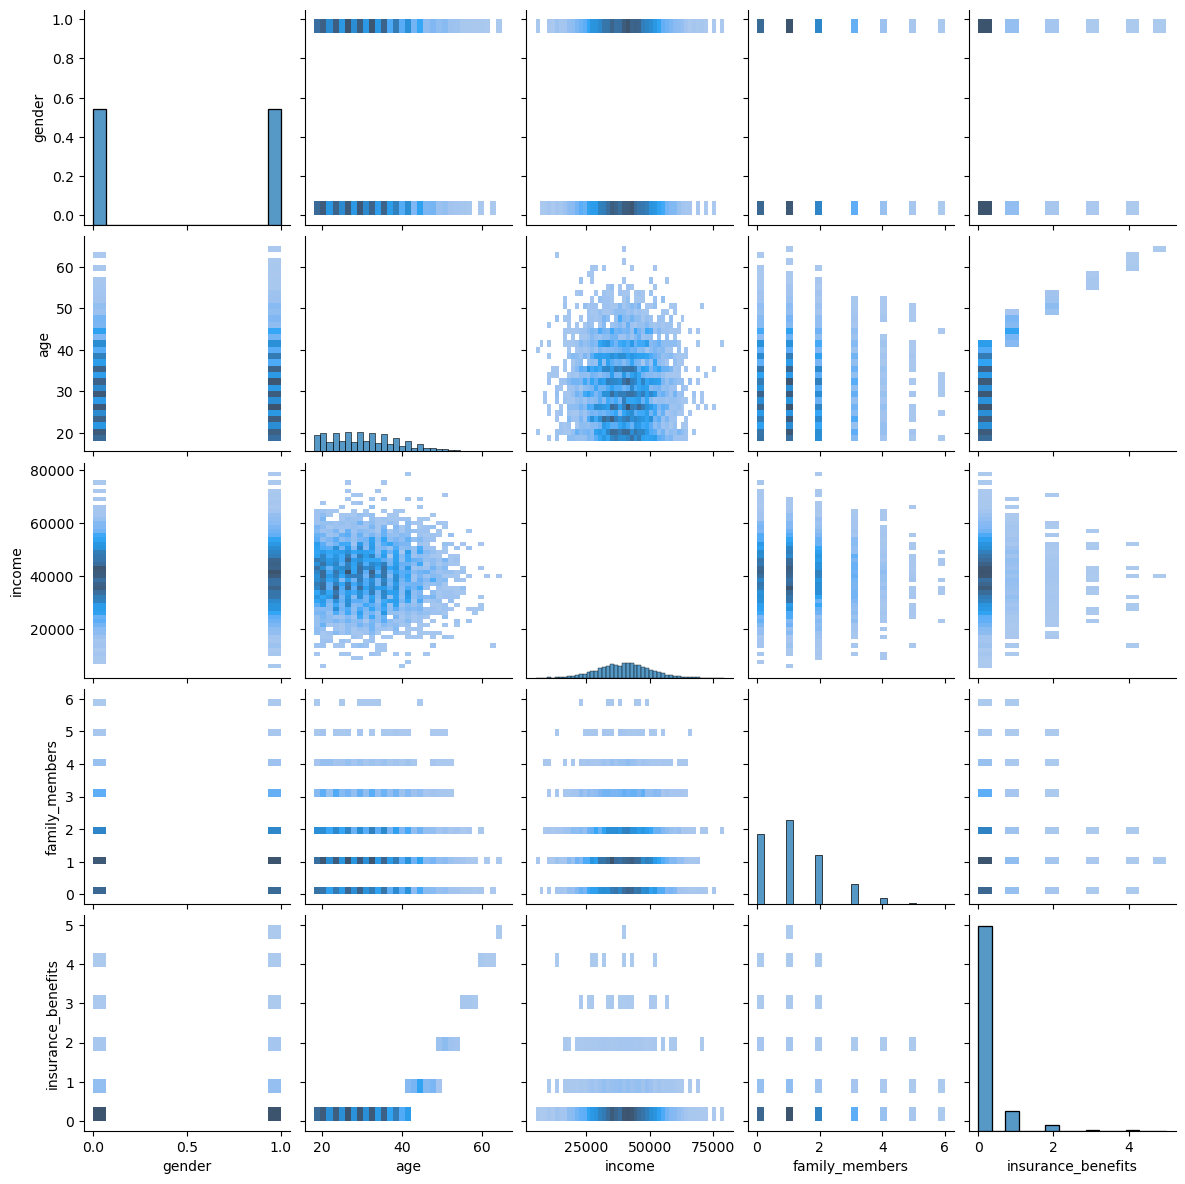

In [13]:
# Create a pair plot to check for the presence of distinct customer groups, based one each column

g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

## Tasks

### Task 1: Similar Customers

A custom function is utilized to find similar customers by obtaining the k nearest neighbors, from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors), for a specified object, disregarding the number of received insurance benefits. Evaluation of this function is conducted across four scenarios derived from the combination of two factors:


Test it for four combination of two cases:
- Scaling
  - unscaled data
  - scaled data (using the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler)
- Distance Metrics
  - Euclidean
  - Manhattan

The goal is to evaluate the following:
- Impact of unscaled data on the kNN algorithm, if any, and its manifestation.
- Similarity of results when using the Manhattan distance metric, irrespective of scaling.

In [14]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [15]:
# Function to get the K-Nearest Neighbors

def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, algorithm='ball_tree', metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

In [16]:
# Scale the dataset

feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [17]:
# Sample scaled data

df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2142,0,0.492308,0.581013,0.166667,0
3720,1,0.600000,0.517722,0.166667,0
2356,0,0.600000,0.341772,0.166667,0
613,1,0.492308,0.356962,0.000000,0
2722,0,0.446154,0.534177,0.333333,0


In [18]:
# Test cases
test_cases = [
    {"description": "Not scaled, Euclidean\n", "data_type": df, "metric": 'euclidean'},
    {"description": "Not scaled, Manhattan\n", "data_type": df, "metric": 'manhattan'},
    {"description": "Scaled, Euclidean\n", "data_type": df_scaled, "metric": 'euclidean'},
    {"description": "Scaled, Manhattan\n", "data_type": df_scaled, "metric": 'manhattan'}
]

# Call get_knn function for each test case
for case in test_cases:
    print(case["description"])
    print(get_knn(df=case['data_type'], n=5, k=10, metric=case["metric"]))
    print('\n-----------------------------------------------------------------------------\n')

Not scaled, Euclidean

      gender  age   income  family_members  insurance_benefits  distance
5          1   43  41000.0               2                   1  0.000000
1995       0   45  41000.0               0                   1  3.000000
3801       0   46  41000.0               2                   1  3.162278
3972       1   40  41000.0               1                   0  3.162278
4763       1   46  41000.0               1                   1  3.162278
2759       0   47  41000.0               3                   1  4.242641
2717       0   37  41000.0               0                   0  6.403124
3434       1   36  41000.0               2                   0  7.000000
1740       0   36  41000.0               1                   0  7.141428
2876       0   35  41000.0               2                   0  8.062258

-----------------------------------------------------------------------------

Not scaled, Manhattan

      gender  age   income  family_members  insurance_benefits  distanc

/Users/marlonnunez/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/marlonnunez/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/marlonnunez/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/Users/marlonnunez/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

Data scaling plays a significant role in the performance of kNN. In kNN, the choice of distance metric and feature scaling are crucial for comparing data points.
- Large values in some features can distort distance calculations and bias results.
- Euclidean distance treats all features equally, so larger values in some features have a greater impact on distance.
- Manhattan distance simply adds up the absolute differences between each feature. It's less influenced by large values in one feature, but it can still be affected by feature scaling.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The results appear quite similar regardless of scaling. This is because Manhattan distance is less sensitive to the scale of individual features compared to Euclidean distance.

### Task 2: Is Customer Likely to Receive Insurance Benefit?

To determine if a customer is likely to receive insurance benefits, we can compare the performance of the kNN classification approach with a dummy model. The data should be split into training and testing sets in a 70:30 proportion.

Process:
- Develop a [kNN-based classification algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) and evaluate its quality using the F1 metric for k values ranging from 1 to 10 on both the original and scaled datasets. This will analyze how the choice of k affects the evaluation metric and whether scaling the data produces any notable differences. Utilize the kNN classification algorithm implementation from scikit-learn or devise a custom implementation.
- Construct a dummy model that returns "1" with a certain probability. Test the model with four probability values: 0, the probability of receiving any insurance benefit, 0.5, and 1.


The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$


In [19]:
# Classify Benefits

df['insurance_benefits_received'] = np.where(df['insurance_benefits'] > 0, 1, 0)

In [20]:
# Check for class imbalance

print(df['insurance_benefits_received'].value_counts())

insurance_benefits_received
0    4436
1     564
Name: count, dtype: int64


In [21]:
# Declare features and target

features = df.drop(['insurance_benefits', 'insurance_benefits_received'], axis=1)
target = df['insurance_benefits_received']

# OHE the 'gender' feature
features = pd.get_dummies(features, columns=['gender'], drop_first=True)

# Split data into a train and validation dataset (use a 70:30 split)
train_features, valid_features, train_target, valid_target = train_test_split(features, target, 
                                                                              test_size = 0.3, random_state=12345)

In [22]:
# Function to scale the data

def scale_features(data, feature_names=['age', 'income', 'family_members'], scaler=None):
    if not scaler:
        scaler = sklearn.preprocessing.MaxAbsScaler().fit(data[feature_names].to_numpy())
    features_scaled = data.copy()
    features_scaled.loc[:, feature_names] = scaler.transform(data[feature_names].to_numpy())
    return features_scaled, scaler

# Scale the features
train_features_scaled, scaler = scale_features(train_features)
valid_features_scaled, _ = scale_features(valid_features, scaler=scaler)

In [23]:
# Function to evaluate model

def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')

    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print(cm)

In [24]:
# Generate output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [25]:
# Find F1 score for k 1-10 (unscaled data)

for integer in range(1, 11):
    print(f'n_neighbors = {integer}', '\n')
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=integer)
    model.fit(train_features, train_target)
    predictions = model.predict(valid_features)
    eval_classifier(valid_target, predictions)
    print('\n-----------------------------------------------------------------------------\n')

n_neighbors = 1 

F1: 0.61
Confusion Matrix
[[1307   30]
 [  79   84]]

-----------------------------------------------------------------------------

n_neighbors = 2 

F1: 0.41
Confusion Matrix
[[1331    6]
 [ 120   43]]

-----------------------------------------------------------------------------

n_neighbors = 3 

F1: 0.41
Confusion Matrix
[[1319   18]
 [ 117   46]]

-----------------------------------------------------------------------------

n_neighbors = 4 

F1: 0.28
Confusion Matrix
[[1333    4]
 [ 136   27]]

-----------------------------------------------------------------------------

n_neighbors = 5 

F1: 0.27
Confusion Matrix
[[1328    9]
 [ 136   27]]

-----------------------------------------------------------------------------

n_neighbors = 6 

F1: 0.11
Confusion Matrix
[[1335    2]
 [ 153   10]]

-----------------------------------------------------------------------------

n_neighbors = 7 

F1: 0.11
Confusion Matrix
[[1333    4]
 [ 153   10]]

----------------------

In [26]:
# Find F1 score for k 1-10 (scaled data)

for integer in range(1, 11):
    print('n_neighbors =', integer, '\n')
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=integer)
    model.fit(train_features_scaled, train_target)
    predictions_scaled = model.predict(valid_features_scaled)
    eval_classifier(valid_target, predictions_scaled)
    print('\n-----------------------------------------------------------------------------\n')

n_neighbors = 1 

F1: 0.97
Confusion Matrix
[[1333    4]
 [   7  156]]

-----------------------------------------------------------------------------

n_neighbors = 2 

F1: 0.93
Confusion Matrix
[[1336    1]
 [  21  142]]

-----------------------------------------------------------------------------

n_neighbors = 3 

F1: 0.95
Confusion Matrix
[[1334    3]
 [  13  150]]

-----------------------------------------------------------------------------

n_neighbors = 4 

F1: 0.91
Confusion Matrix
[[1334    3]
 [  25  138]]

-----------------------------------------------------------------------------

n_neighbors = 5 

F1: 0.92
Confusion Matrix
[[1330    7]
 [  17  146]]

-----------------------------------------------------------------------------

n_neighbors = 6 

F1: 0.90
Confusion Matrix
[[1335    2]
 [  27  136]]

-----------------------------------------------------------------------------

n_neighbors = 7 

F1: 0.92
Confusion Matrix
[[1331    6]
 [  19  144]]

----------------------

In [27]:
# Find F1 score for different probabilities (0-100%)

for P in np.arange(0, 1.1, 0.1):
    print(f'The probability: {P:.2f}')
    y_pred_rnd = np.random.choice([0, 1], size=len(df), p=[1-P, P])
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    print('\n-----------------------------------------------------------------------------\n')

The probability: 0.00
F1: 0.00
Confusion Matrix
[[4436    0]
 [ 564    0]]

-----------------------------------------------------------------------------

The probability: 0.10
F1: 0.10
Confusion Matrix
[[3976  460]
 [ 508   56]]

-----------------------------------------------------------------------------

The probability: 0.20
F1: 0.13
Confusion Matrix
[[3543  893]
 [ 463  101]]

-----------------------------------------------------------------------------

The probability: 0.30
F1: 0.16
Confusion Matrix
[[3133 1303]
 [ 403  161]]

-----------------------------------------------------------------------------

The probability: 0.40
F1: 0.17
Confusion Matrix
[[2666 1770]
 [ 353  211]]

-----------------------------------------------------------------------------

The probability: 0.50
F1: 0.19
Confusion Matrix
[[2160 2276]
 [ 270  294]]

-----------------------------------------------------------------------------

The probability: 0.60
F1: 0.19
Confusion Matrix
[[1721 2715]
 [ 210  3

**Findings**

The results above indicate that training the model with scaled data significantly improved the F1 score. When unscaled data was used, the F1 scores were relatively low for finding the n-th nearest neighbors. Switching to scaled data yielded significantly better results, outperforming the dummy regressor.

### Task 3: Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [28]:
class MyLinearRegression:
    
    def __init__(self):
        self.w = None
        self.w0 = None
    
    def fit(self, X, y):
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.w = np.linalg.inv(np.dot(X2.T, X2)).dot(X2.T).dot(y)

    def predict(self, X):
        X2 = np.append(np.ones((len(X), 1)), X, axis=1)
        y_pred = X2.dot(self.w)
        
        return y_pred

In [29]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [30]:
# LinearRegression for unscaled data

# Declare features and target
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Create instance of LR model
lr = MyLinearRegression()

# Fit the linear regression model
lr.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = lr.predict(X_test)
print(y_test_pred)

# Evaluate the regression model
eval_regressor(y_test, y_test_pred)

[ 0.17926625  0.80931996  0.45614337 ... -0.00870507  0.1068024
  0.44539183]
RMSE: 0.34
R2: 0.66


In [31]:
# LinearRegression for scaled data

# Declare features and target
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Scale the features
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit_transform(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create instance of LR model
lr = MyLinearRegression()

# Fit the linear regression model
lr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred = lr.predict(X_test_scaled)
print(y_test_pred)

# Evaluate the regression model
eval_regressor(y_test, y_test_pred)

[ 0.17926625  0.80931996  0.45614337 ... -0.00870507  0.1068024
  0.44539183]
RMSE: 0.34
R2: 0.66


**Findings:** The Root Mean Squared Error (RMSE) values remain consistent regardless of whether linear regression is applied to scaled or unscaled data.

### Task 4: Obfuscating Data

Data obfuscation is optimally achieved by multiplying the numerical features, represented as matrix $X$, with an invertible matrix $P$:

$$
X' = X \times P
$$

Executing this transformation will alter the values of the features. It is imperative to verify that $P$ is indeed invertible.

In [32]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]


In [33]:
# Create Matrix X

X = df_pn.to_numpy()

In [34]:
# View Matrix X 
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [35]:
# Create a random matrix P.

rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [36]:
# Check that Matrix P is invertible; if so, find the inverse

try:
    np.allclose(np.dot(P, np.linalg.inv(P)), np.eye(4))
except:
    print("Matrix P is not invertible")
else:
    inverse_P = np.linalg.inv(P)
    print('Matrix P:\n', P)
    print()
    print('Inverse Matrix P:\n', inverse_P)
    

Matrix P:
 [[0.77395605 0.43887844 0.85859792 0.69736803]
 [0.09417735 0.97562235 0.7611397  0.78606431]
 [0.12811363 0.45038594 0.37079802 0.92676499]
 [0.64386512 0.82276161 0.4434142  0.22723872]]

Inverse Matrix P:
 [[ 0.41467992 -1.43783972  0.62798546  1.14001268]
 [-1.06101789  0.44219337  0.1329549   1.18425933]
 [ 1.42362442  1.60461607 -2.0553823  -1.53699695]
 [-0.11128575 -0.65813802  1.74995517 -0.11816316]]


In [37]:
# Transform Matrix X, save to variable

X_transformed = np.dot(X, P)

**Question:** Can you guess the customers' ages or income after the transformation?

**Response:** Following the transformation (as seen below), it is not possible to discern income or age. The income values change severely and the age values are now in the thousands, a scale not representative of human ages.

In [38]:
# View first 5 rows of Matrix X'

print(X_transformed[:5])

[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]


**Question:** Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

**Response:** Original data was recovered by multiplying the inverse of $P$ by $X'$

In [39]:
# Recover the original data from the transfromed matrix

X_recovered = np.dot(X_transformed, inverse_P)

In [40]:
# Print original data and recovered data for comparison

print('Is the original data recovered accurately? ', 'Yes' if np.allclose(X, X_recovered) else 'No', '\n')

Is the original data recovered accurately?  Yes 



In [41]:
# Print all three cases for a few customers

print('Original data (first 5 rows):\n', X[:5])
print()
print('Transformed data (first 5 rows):\n', X_transformed[:5])
print()
print('Recovered data (first 5 rows):\n', X_recovered[:5])

Original data (first 5 rows):
 [[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]]

Transformed data (first 5 rows):
 [[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]]

Recovered data (first 5 rows):
 [[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [-4.47363596e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-2.51586878e-12  2.90000000e+01  2.10000000e+04  9.52452315e-13]
 [-4.84498208e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]
 [ 1.00000000e+00  2.80000000e+01  2.61000000e+04 -1.01990740e-13]]


**Question:** You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

**Response:** Several factors could account for the disparity between the original and recovered data:
1. Loss of information during transformation might have taken place.
2. Rounding or precision issues can arise from floating-point calculations, particularly noticeable with data of high precision. For instance, many of the discrepancies involve extremely low or high values, such as -4.47363596e-12 or 9.52452315e-13, instead of 0.00e+00.

#### Proof That Data Obfuscation Can Work with LR

Linear regression has been employed to solve the regression task. The next step is to analytically establish that the given obfuscation method will not alter linear regression in terms of predicted values; specifically, the values will remain constant. This assertion requires substantiation rather than mere belief.

Given that the data is obfuscated, represented as $X \times P$ rather than just $X$, additional weights $w_P$ are introduced as:

$$w=(X^TX)^−1 X^Ty   ⇒  w_P=[(XP)^T XP]^−1(XP)^Ty$$

Upon simplification of the formula for $w_P$, how are $w$ and $w_P$ related? What are the predicted values with $w_P$? And what implications does this have for the quality of linear regression when measured by RMSE?

**Analytical proof**

To link the weights $w$ and $w_P$, and to understand the implications on predicted values and the quality of linear regression, let's simplify the expression for $w_P$.

**Simplification of $w_P$**

**Given:**
$w_P = [(XP)^T XP]^{-1} (XP)^T y$

First, let's denote $X_P = XP$. Then,
$w_P = (X_P^T X_P)^{-1} X_P^T y$

Using $ X_P = XP $, we can rewrite this as:
$w_P = [(XP)^T (XP)]^{-1} (XP)^T y$

Expanding this, we have:
$w_P = (P^T X^T XP)^{-1} P^T X^T y$

Since $P^T X^T XP$ can be factored as $P^T (X^T X) P$, we get:
$w_P = [P^T (X^T X) P]^{-1} P^T X^T y$

Now, applying the matrix inversion lemma:
$[P^T (X^T X) P]^{-1} = P^{-1} (X^T X)^{-1} (P^T)^{-1}$

Thus,
$w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$

Since $(P^T)^{-1} P^T = I$ (identity matrix), this simplifies to:
$w_P = P^{-1} (X^T X)^{-1} X^T y$

And we know that $w = (X^T X)^{-1} X^T y$, so:
$w_P = P^{-1} w$

**Predicted Values with $w_P$**

To make predictions using $w_P$, we need to use the transformed feature matrix $X_P$.

The predicted values using $w_P$ are given by:
$\hat{y}_P = X_P w_P$

Substituting $X_P = XP$ and $w_P = P^{-1} w$, we get:
$\hat{y}_P = XP (P^{-1} w)$

Since $P P^{-1} = I$ (identity matrix), this simplifies to:
$\hat{y}_P = X w$

Therefore, the predicted values using $w_P$ are:
$\hat{y}_P = \hat{y}$

**Implications for the Quality of Linear Regression (RMSE)**

The Root Mean Squared Error (RMSE) is a measure of the differences between the values predicted by the model and the actual values observed. It is given by:
$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}$

Since we have shown that the predicted values $\hat{y}_P$ are the same as the predicted values $\hat{y}$ from the original model when using the transformed feature matrix $X_P$, the RMSE for both models will be the same.

**Conclusion**

The transformation using $P$ doesn't change the predicted values of the model when using the transformed feature matrix $X_P$. Hence, the quality of linear regression measured by RMSE remains unchanged. The weights $w_P$ are related to the original weights $w$ by $w_P = P^{-1} w$. This transformation effectively reparameterizes the problem without affecting the predictions or the RMSE when the transformed feature matrix is used.

However, if we attempt to make predictions using $ w_P$ with the original feature matrix $X$ (without applying $P $), the results will not be the same unless $P$ is an identity matrix. This is because:
$X w_P = X P^{-1} w \neq X w $

Therefore, to ensure the predictions remain the same, we must use the transformed feature matrix $X_P$ when using $ w_P $.



#### Test Linear Regression With Data Obfuscation

To demonstrate the computational viability of Linear Regression with the chosen obfuscation transformation, we will:
1. Develop a procedure or class capable of running Linear Regression, optionally incorporating the obfuscation.
2. Apply Linear Regression to both the original dataset and the obfuscated dataset.
3. Compare the predicted values and evaluate the Root Mean Square Error (RMSE) and coefficient of determination ($R^2$) metrics for any differences.

In [42]:
# Linear Regression without Data Obfuscation

# Train model with obfuscated data
model = MyLinearRegression()

# Fit the linear regression model
model.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
eval_regressor(y_test, y_test_pred)

RMSE: 0.34
R2: 0.66


In [43]:
# Create a square matrix of random numbers

rng = np.random.default_rng(seed=50)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [44]:
np.allclose((P.dot(np.linalg.inv(P))), np.eye(4))

True

In [45]:
# Linear Regression with Data Obfuscation

# Create matrix XP
XP_train = X_train.dot(P)
XP_test = X_test.dot(P)

# Train model with obfuscated data
model = MyLinearRegression()

# Fit the linear regression model
model.fit(XP_train, y_train)

# Make predictions on the test set
y_test_pred_obfs = model.predict(XP_test)

# Evaluate the model
eval_regressor(y_test, y_test_pred_obfs)

RMSE: 0.34
R2: 0.66


**Findings:** The RMSE and $R^2$ values obtained from running a linear regression on data with and without obfuscation proved to be identical to each other. There was absolutely no difference whether the data was obfuscated or not.

## Conclusions

**Conclusion:**

When identifying customers most similar to a specific customer (customer at index 5), the Euclidean distance method provided the most accurate results. Particularly, when the data was scaled and Euclidean distance was applied, the outcomes were highly precise.

Regarding the prediction of whether a customer is likely to receive insurance benefits, the data suggests a high likelihood of receiving benefits. Evaluations using both scaled data yielded relatively high F1 scores (the lowest being 0.88), while using unscaled data provided realtively low results, indicating the model's strong accuracy when using scaled data. The model is fairly accurate when prediciting whether or not the user will get insurance benefits.

For predicting the number of insurance benefits a new customer is likely to receive, a linear regression model was used. This model achieved an RMSE score of 0.34 and an R² score of 0.66. Notably, when the data was obfuscated, the results remained consistent, demonstrating that protecting user data did not compromise the model's integrity.

## Appendices 

### Appendix B: Properties of Matrices

Matrices possess numerous properties in Linear Algebra. Several of these properties are outlined here to assist with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>